# NBA Stats and Salaries Analysis

Can we tell which players make above league average just by looking at their stats? Of course looking at the stats of players like LeBron James, Steph Curry and James Harden we can clearly see that their stats dictate that they make above league average. However, what about players like Trae Young, Zion Williamson or Mikal Bridges? The goal of my project is to analyze the statistics of the 2020-2021 season and construct a machine learning model that can predict whether players made above or below the league average of $7,689,656. There are several factors that go into this injuries, draft pick contracts, how they're used in their offense but I will do the best I can. 

In [246]:
import sys
import os
os.chdir('C:\\Users\\wally')
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score, log_loss,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from matplotlib import lines as plt_lines
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
os.chdir('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts')

In [247]:
ss = pd.read_csv('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\basketball\\NBA Stats and Salaries merge csv file.csv')
ss = ss.rename(columns = {'salary_above_average': 'salary'})

In [248]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rk                439 non-null    int64  
 1   player_name       439 non-null    object 
 2   Pos               439 non-null    object 
 3   Age               439 non-null    int64  
 4   Tm                439 non-null    object 
 5   G                 439 non-null    int64  
 6   GS                439 non-null    int64  
 7   MP                439 non-null    int64  
 8   FG                439 non-null    int64  
 9   FGA               439 non-null    int64  
 10  FG%               439 non-null    float64
 11  3P                439 non-null    int64  
 12  3PA               439 non-null    int64  
 13  3P%               439 non-null    float64
 14  2P                439 non-null    int64  
 15  2PA               439 non-null    int64  
 16  2P%               439 non-null    float64
 1

    Variable Description:
    RK = Alphabetical Rank Among Players
    player_name = Player Name
    Pos = Player Position
    Age = Age
    Tm = Team
    G = Games Played
    GS = Games Started
    MP = Minutes Played
    FG = Field Goals Made
    FGA = Field Goals Attempted
    FG% = Field Goal Percentage
    3P = 3 Pointers Made
    3PA = 3 Pointers Attempted
    3P% = 3 Point Percentage
    2P = 2 Pointers Made
    2PA = 2 Pointers Attempted
    2P% = 2 Point Percentage
    eFG% = Effective Field Goal Percentage (Adjusts for 3 points being 1 more point than two pointers)
    FT = Free Throws Made
    FTA = Free Throws Attempted
    FT% = Free Throw Percentage
    ORB = Offensive Rebounds
    DRB = Defensive Rebounds
    TRB = Total Rebounds
    AST = Assists
    STL = Steals
    BLK = Blocks
    TOV = Turnovers
    PF = Personal Fouls
    PTS = Points
    salary_rank = Rank based on salary for 2020-21 season
    salary_20-21 = Salary for 2020-21 season
    salary_21-22 = Salary for 2021-22 season
    signed_using = Type of contract
    guaranteed_money = Guaranteed money for length of contract
    salary = Indicates whether the player earns more than 7689656 USD for the 2020-21 season. 1 = Above Average, 0 = Below Average

In [249]:
ss_top_ten = ss.loc[[94, 417, 321, 412, 160, 202, 111, 138, 85, 67]]
ss_top_ten

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_rank,salary_20-21,salary_21-22,signed_using,guaranteed_money,salary
94,110,Stephen Curry,PG,32,GSW,42,42,1419,407,855,0.476,196,483,0.406,211,372,0.567,0.591,225,243,0.926,22,207,229,254,56,4,132,74,1235,1,43006362,45780966,Bird Rights,88787328.0,1
417,488,Russell Westbrook,PG,32,WAS,42,42,1479,347,804,0.432,56,181,0.309,291,623,0.467,0.466,165,269,0.613,68,371,439,442,53,17,210,118,915,2,41358814,44211146,Bird Rights,85569960.0,1
321,373,Chris Paul,PG,35,PHO,48,48,1525,291,591,0.492,64,173,0.370,227,418,0.543,0.547,123,133,0.925,19,205,224,421,70,11,110,117,769,3,41358814,44211146,Bird Rights,41358814.0,1
412,480,John Wall,PG,30,HOU,32,32,1018,229,573,0.400,62,195,0.318,167,378,0.442,0.454,126,169,0.746,15,93,108,217,33,25,108,39,646,4,41254920,44310840,Bird Rights,85565760.0,1
160,187,James Harden,PG-SG,31,TOT,42,42,1558,334,722,0.463,117,327,0.358,217,395,0.549,0.544,275,316,0.870,35,301,336,457,50,29,173,95,1060,5,40824000,43848000,Bird Rights,84672000.0,1
202,235,LeBron James,PG,36,LAL,41,41,1388,388,756,0.513,98,266,0.368,290,490,0.592,0.578,168,239,0.703,24,299,323,323,43,24,152,65,1042,6,39219565,41180544,Cap Space,124875097.0,1
111,131,Kevin Durant,PF,32,BRK,19,18,679,188,359,0.524,49,113,0.434,139,246,0.565,0.592,126,145,0.869,7,132,139,100,14,27,67,43,551,7,39058950,40918900,Sign and Trade,79977850.0,1
138,162,Paul George,SF,30,LAC,38,38,1268,298,636,0.469,119,281,0.423,179,355,0.504,0.562,127,144,0.882,33,207,240,205,43,17,121,88,842,8,35450412,39344970,Maximum Salary,162928115.0,1
85,100,Mike Conley,PG,33,UTA,40,40,1188,230,502,0.458,112,266,0.421,118,236,0.500,0.570,92,108,0.852,31,108,139,221,55,6,77,75,664,10,34504132,0,Cap Space,34504132.0,1
67,79,Jimmy Butler,SF,31,MIA,35,35,1178,246,507,0.485,14,68,0.206,232,439,0.528,0.499,236,277,0.852,71,192,263,256,69,13,76,51,742,11,34379100,36016200,Sign and Trade,70395300.0,1


Below, is a scatterplot of Minutes Played vs. Games Played and how those salaries are ranked. As expected, the players who make more money tend to play more games and minutes.

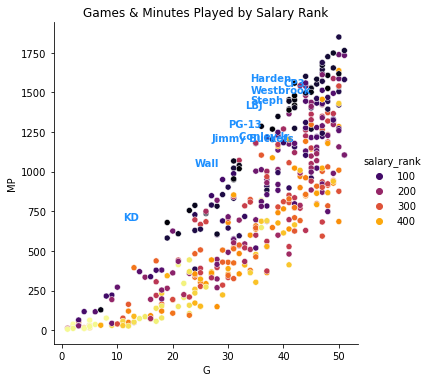

In [250]:
sns.relplot(x = 'G', y = 'MP', hue = 'salary_rank', data = ss, palette = 'inferno')
plt.title('Games & Minutes Played by Salary Rank')
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','James Harden','LeBron James','Kevin Durant','Paul George','Mike Conley','Jimmy Butler']
t10_nick = ['Steph','Westbrook','CP3','Wall','Harden','LBJ','KD','PG-13','Conley Jr.','Jimmy Buckets']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss.G[ss.player_name == i]-8.0, ss['MP'][ss.player_name == i]+15.0, j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')

Below is the same graph but only with the Top 10 players, as we can see because Kevin Durant has been out a large portion of the season, his point is close to the origin. Whereas Chris Paul and James Harden have a high usage rate.

Text(85    40.5
Name: G, dtype: float64, 85    1188
Name: MP, dtype: int64, 'Conley Jr.')

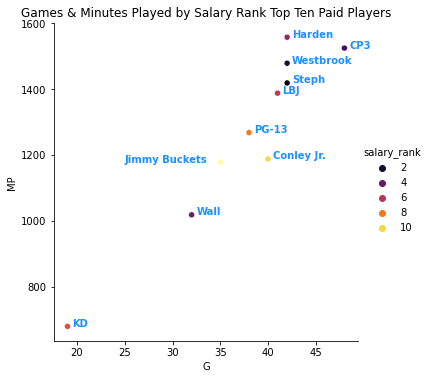

In [251]:
sns.relplot(x = 'G', y = 'MP', hue = 'salary_rank', data = ss_top_ten, palette = 'inferno')
plt.title('Games & Minutes Played by Salary Rank Top Ten Paid Players')
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','James Harden','LeBron James','Kevin Durant','Paul George']
t10_nick = ['Steph','Westbrook','CP3','Wall','Harden','LBJ','KD','PG-13']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss_top_ten.G[ss_top_ten.player_name == i]+0.5, ss_top_ten['MP'][ss_top_ten.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten.G[ss_top_ten.player_name == 'Jimmy Butler']-10.0, ss_top_ten['MP'][ss_top_ten.player_name == 'Jimmy Butler'], 'Jimmy Buckets', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed') 
plt.text(ss_top_ten.G[ss_top_ten.player_name == 'Mike Conley']+0.5, ss_top_ten['MP'][ss_top_ten.player_name == 'Mike Conley'], 'Conley Jr.', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')

Below is a scatterplot of efficiency and scoring. As expected, we see Steph Curry at the top right and Jimmy Butler, while high in points, doesn't take that many threes. In the following plot we see points against ast and Chris Paul, James Harden and Russell Westbrook are among the league leaders in assists.

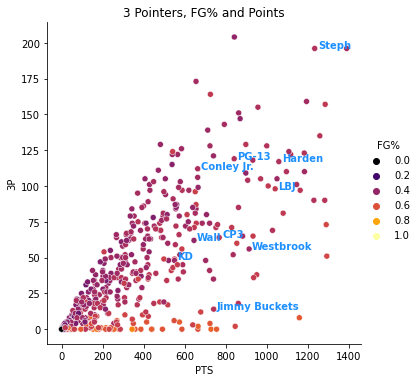

In [252]:
sns.relplot(x = 'PTS', y = '3P', hue = 'FG%', data = ss, palette = 'inferno')
plt.title('3 Pointers, FG% and Points')
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','James Harden','LeBron James','Kevin Durant','Paul George','Mike Conley','Jimmy Butler']
t10_nick = ['Steph','Westbrook','CP3','Wall','Harden','LBJ','KD','PG-13','Conley Jr.','Jimmy Buckets']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss.PTS[ss.player_name == i]+15.0, ss['3P'][ss.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold')

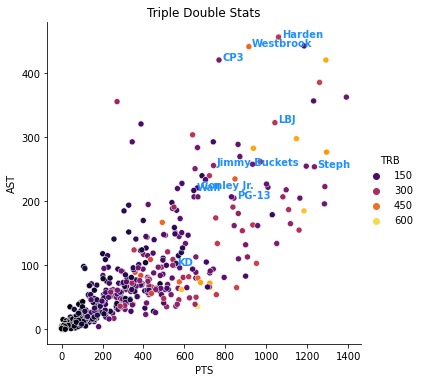

In [253]:
sns.relplot(x = 'PTS', y = 'AST', hue = 'TRB', data = ss, palette = 'inferno')
plt.title('Triple Double Stats')
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','James Harden','LeBron James','Kevin Durant','Paul George','Mike Conley','Jimmy Butler']
t10_nick = ['Steph','Westbrook','CP3','Wall','Harden','LBJ','KD','PG-13','Conley Jr.','Jimmy Buckets']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss.PTS[ss.player_name == i]+15.0, ss['AST'][ss.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')

Text(94    1155.0
Name: PTS, dtype: float64, 94    254
Name: AST, dtype: int64, 'Curry')

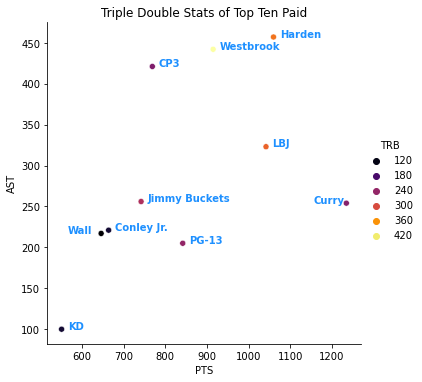

In [254]:
ax = sns.relplot(x = 'PTS', y = 'AST', hue = 'TRB', data = ss_top_ten, palette = 'inferno')
plt.title('Triple Double Stats of Top Ten Paid')
top_ten = ['Russell Westbrook','Chris Paul','James Harden','LeBron James','Kevin Durant','Paul George']
t10_nick = ['Westbrook','CP3','Harden','LBJ','KD','PG-13']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss_top_ten.PTS[ss_top_ten.player_name == i]+15.0, ss_top_ten['AST'][ss_top_ten.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten.PTS[ss_top_ten.player_name == 'Jimmy Butler']+15.0, ss_top_ten['AST'][ss_top_ten.player_name == 'Jimmy Butler'], 'Jimmy Buckets', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed') 
plt.text(ss_top_ten.PTS[ss_top_ten.player_name == 'Mike Conley']+15.0, ss_top_ten['AST'][ss_top_ten.player_name == 'Mike Conley'], 'Conley Jr.', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten.PTS[ss_top_ten.player_name == 'John Wall']-80.0, ss_top_ten['AST'][ss_top_ten.player_name == 'John Wall'], 'Wall', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten.PTS[ss_top_ten.player_name == 'Stephen Curry']-80.0, ss_top_ten['AST'][ss_top_ten.player_name == 'Stephen Curry'], 'Curry', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')

Shooting percentages below showing how efficient Steph Curry, Kevin Durant and Chris Paul whereas Russell Westbrook and Lebron James aren't nearly as efficient from 3 point range or the free throw line.

Text(85    0.58
Name: eFG%, dtype: float64, 85    0.852
Name: FT%, dtype: float64, 'Conley Jr.')

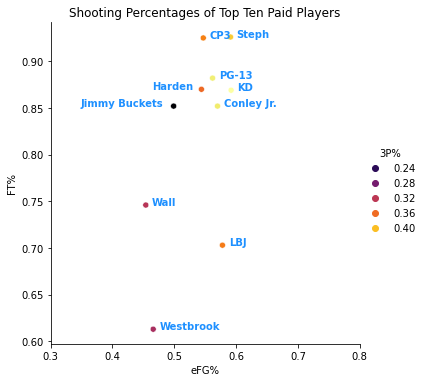

In [255]:
sns.relplot(x = 'eFG%', y = 'FT%', hue = '3P%', data = ss_top_ten, palette = 'inferno')
plt.title('Shooting Percentages of Top Ten Paid Players')
plt.xlim(0.3,0.8)
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','LeBron James','Kevin Durant','Paul George']
t10_nick = ['Steph','Westbrook','CP3','Wall','LBJ','KD','PG-13']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss_top_ten['eFG%'][ss_top_ten.player_name == i]+0.01, ss_top_ten['FT%'][ss_top_ten.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten['eFG%'][ss_top_ten.player_name == 'Jimmy Butler']-0.15, ss_top_ten['FT%'][ss_top_ten.player_name == 'Jimmy Butler'], 'Jimmy Buckets', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed') 
plt.text(ss_top_ten['eFG%'][ss_top_ten.player_name == 'James Harden']-0.08, ss_top_ten['FT%'][ss_top_ten.player_name == 'James Harden'], 'Harden', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten['eFG%'][ss_top_ten.player_name == 'Mike Conley']+0.01, ss_top_ten['FT%'][ss_top_ten.player_name == 'Mike Conley'], 'Conley Jr.', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')

Defensive stats are nearly as coveted as offensive statistics, even so Chris Paul and Jimmy Butler get more steals and we know Westbrook is active on the boards.

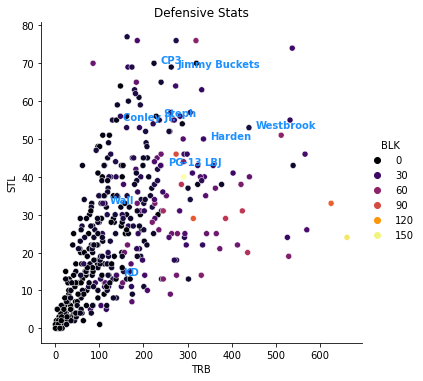

In [256]:
sns.relplot(x = 'TRB', y = 'STL', hue = 'BLK', data = ss, palette = 'inferno')
plt.title('Defensive Stats')
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','James Harden','LeBron James','Kevin Durant','Paul George','Mike Conley','Jimmy Butler']
t10_nick = ['Steph','Westbrook','CP3','Wall','Harden','LBJ','KD','PG-13','Conley Jr.','Jimmy Buckets']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss.TRB[ss.player_name == i]+15.0, ss['STL'][ss.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold')

Here we see the distribution of how much money players are paid and whether that's above league average or not. We can see many more players are paid below league average.

<ipython-input-257-4441de9a52cf>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['',0,10,20,30,40])


[Text(-10000000.0, 0, ''),
 Text(0.0, 0, '0'),
 Text(10000000.0, 0, '10'),
 Text(20000000.0, 0, '20'),
 Text(30000000.0, 0, '30'),
 Text(40000000.0, 0, '40'),
 Text(50000000.0, 0, '')]

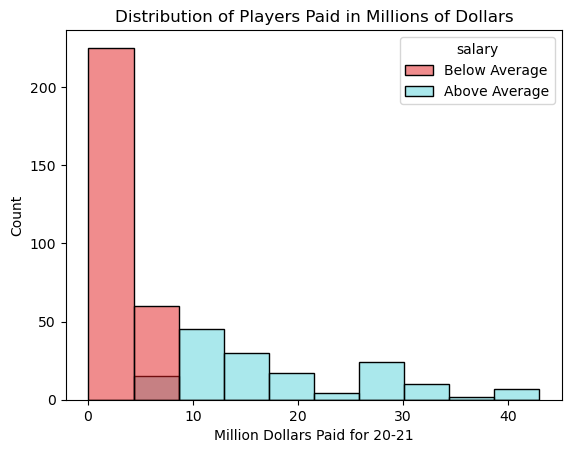

In [257]:
plt.rcParams.update(plt.rcParamsDefault)
hls = sns.color_palette("hls")
pair = sns.color_palette('Paired')
xticks = np.linspace(0,10,5)
hlsg = [hls[3], pair[5]]
hlsg_r = [pair[5], hls[3]]
legend_map = {0: 'Below Average', 1: 'Above Average'}
ax = sns.histplot(x = 'salary_20-21', hue = ss['salary'].map(legend_map), data = ss, bins = 10, palette = hlsg_r)
plt.title('Distribution of Players Paid in Millions of Dollars')
plt.xlabel('Million Dollars Paid for 20-21')
ax.xaxis.set_ticklabels(['',0,10,20,30,40])

Below we can see that there are almost twice as many players who are paid below league average as there are players who are paid above league average.

Text(0.5, 1.0, 'Number of Players Paid Above & Below League Average')

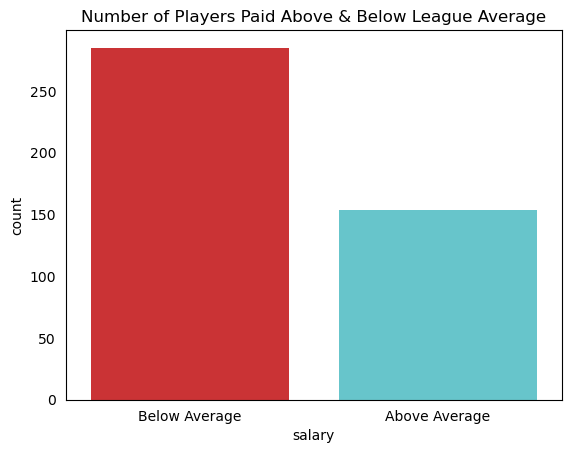

In [258]:
plt.style.use('default')
cp = sns.countplot(x = 'salary', data = ss, palette = hlsg_r)
cp.set(xlabel = 'salary')
plt.tick_params(bottom=0, left=0)
cp.xaxis.set_ticklabels(['Below Average', 'Above Average'])
plt.title('Number of Players Paid Above & Below League Average')

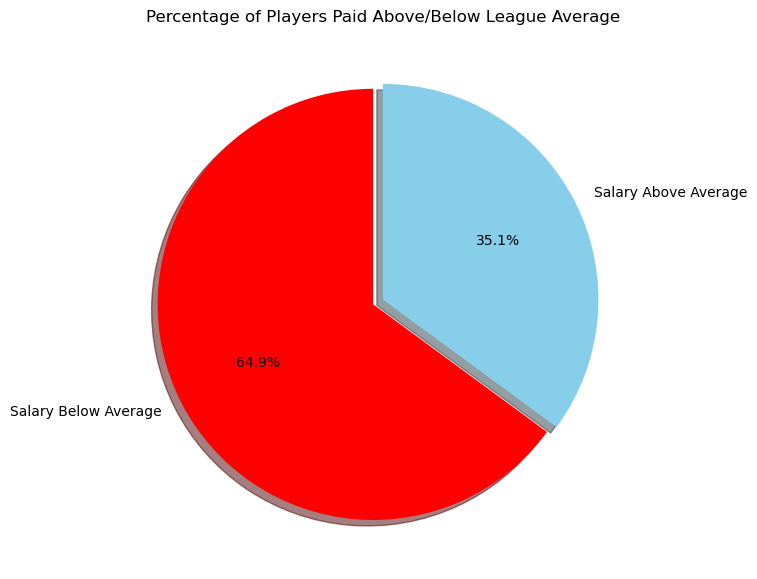

In [259]:
labels = ['Salary Below Average', 'Salary Above Average']
sizes = ss['salary'].value_counts(sort = True)

colors = ['red','skyblue']
explode = (0.05, 0)

pie = plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode ,labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle= 90)

pie.set_facecolor('white')
plt.title('Percentage of Players Paid Above/Below League Average')
plt.show()

The combined salaries of all the players in the NBA in the 2020-2021 season was 3,669,787,369 USD. Although there are many more players that are paid below league average. The players total salaries who are paid below average, only make up 23% of the number above. That means that all the players salaries who make below league average combined to 843,722,530 USD.  77% of the players total salaries are paid to the few players who make above league average. This means that all the salaries of the players who make above league average combined to 2,826,064,839 USD.  This indicates a very top heavy pay scale. About one third of the players in the league make 77% of the total salaries.

2826064839
843722530


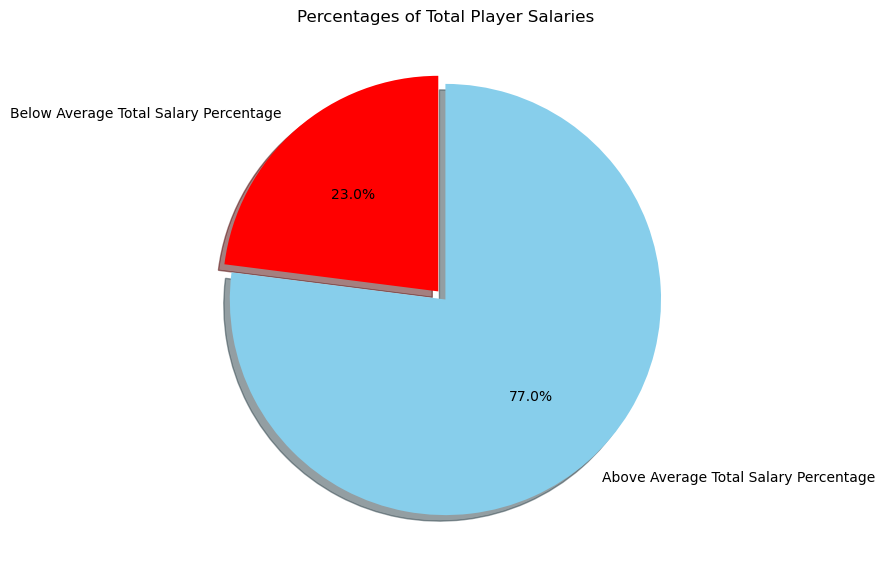

In [260]:
total_salary_aa = ss[ss['salary'] == 1]['salary_20-21'].sum()
total_salary_ba = ss[ss['salary'] == 0]['salary_20-21'].sum()
print(total_salary_aa)
print(total_salary_ba)
labels = ['Below Average Total Salary Percentage', 'Above Average Total Salary Percentage']
sizes = [total_salary_ba,total_salary_aa]

colors = ['red','skyblue']
explode = (0.05, 0)

pie = plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode ,labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle= 90)

pie.set_facecolor('white')
plt.title('Percentages of Total Player Salaries')
plt.show()

Below we see a histogram of players who make above average salary and below average salary based on the points they scored this season. Players who typically make more money, score more points.

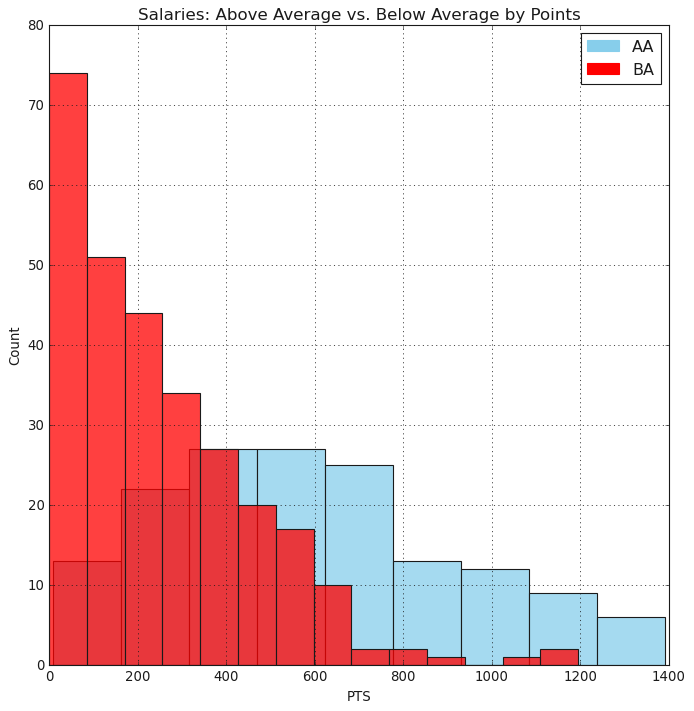

In [261]:
plt.style.use("classic")
bar1 = plt.figure(figsize = (10,10))

sns.histplot(ss[ss['salary'] == 1]['PTS'], color = 'skyblue')
sns.histplot(ss[ss['salary'] == 0]['PTS'], color = 'red')

plt.title('Salaries: Above Average vs. Below Average by Points', fontsize = 15)
plt.xlim()
plt.grid(linewidth = 0.7)
red_patch = mpatches.Patch(color='red', label='BA')
blue_patch = mpatches.Patch(color='skyblue', label='AA')
dat_legend = plt.legend(handles=[blue_patch, red_patch])
bar1.set_facecolor('white')
plt.show()

Players who make more three pointers typically earn more money too. They also start more games as we see in the subsequent graph.

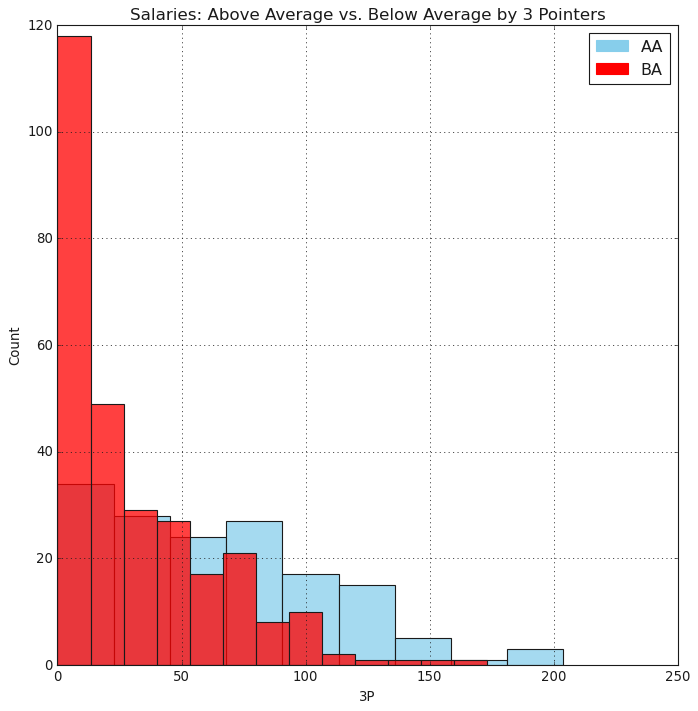

In [262]:
plt.style.use("classic")
bar1 = plt.figure(figsize = (10,10))

sns.histplot(ss[ss['salary'] == 1]['3P'], color = 'skyblue')
sns.histplot(ss[ss['salary'] == 0]['3P'], color = 'red')

plt.title('Salaries: Above Average vs. Below Average by 3 Pointers', fontsize = 15)
plt.xlim()
plt.grid(linewidth = 0.7)
red_patch = mpatches.Patch(color='red', label='BA')
blue_patch = mpatches.Patch(color='skyblue', label='AA')
dat_legend = plt.legend(handles=[blue_patch, red_patch])
bar1.set_facecolor('white')
plt.show()

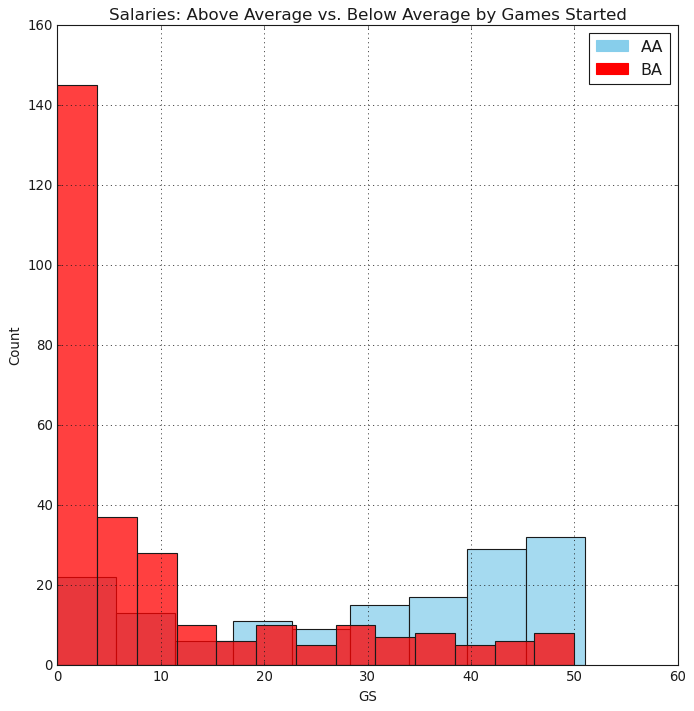

In [263]:
plt.style.use("classic")
bar1 = plt.figure(figsize = (10,10))

sns.histplot(ss[ss['salary'] == 1]['GS'], color = 'skyblue')
sns.histplot(ss[ss['salary'] == 0]['GS'], color = 'red')

plt.title('Salaries: Above Average vs. Below Average by Games Started', fontsize = 15)
plt.xlim()
plt.grid(linewidth = 0.7)
red_patch = mpatches.Patch(color='red', label='BA')
blue_patch = mpatches.Patch(color='skyblue', label='AA')
dat_legend = plt.legend(handles=[blue_patch, red_patch])
bar1.set_facecolor('white')
plt.show()

Getting to the free throw line also earns you more money. The lone player who leads the league in free throws yet makes below league average is Trae Young, who is still on his rookie deal.

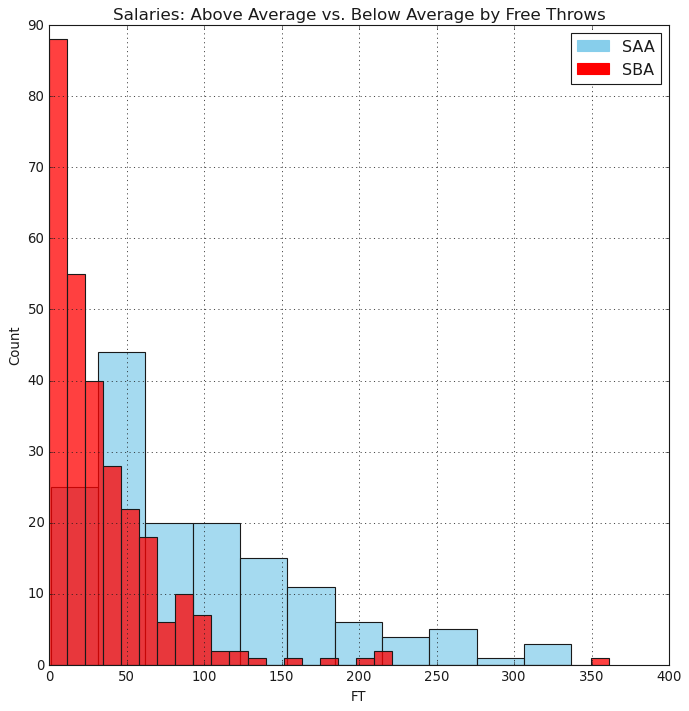

In [264]:
plt.style.use("classic")
bar1 = plt.figure(figsize = (10,10))

sns.histplot(ss[ss['salary'] == 1]['FT'], color = 'skyblue')
sns.histplot(ss[ss['salary'] == 0]['FT'], color = 'red')

plt.title('Salaries: Above Average vs. Below Average by Free Throws', fontsize = 15)
plt.xlim()
plt.grid(linewidth = 0.7)
red_patch = mpatches.Patch(color='red', label='SBA')
blue_patch = mpatches.Patch(color='skyblue', label='SAA')
dat_legend = plt.legend(handles=[blue_patch, red_patch])
bar1.set_facecolor('white')
plt.show()

In [265]:
pd.set_option('display.max_columns', None)
ss.sort_values(by = 'FT', ascending = False).head(20)
pd.set_option('display.max_rows', 20)

Most players in the league have scored less than 400 points this season. The league leader in points is Damian Lillard with 1391 as of April 6th.

Text(0.5, 1.0, 'Distribution of Players by Points')

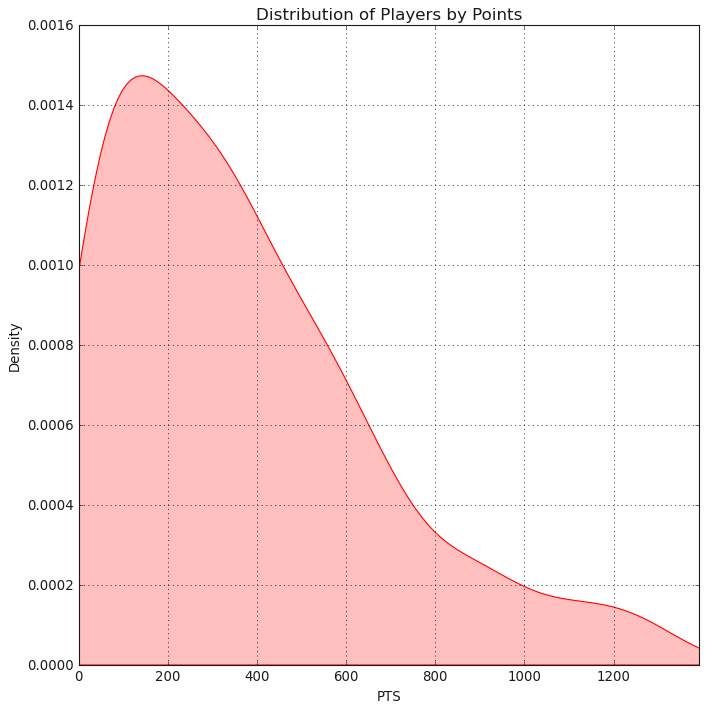

In [266]:
ax = plt.figure(figsize = (10,10))
sns.kdeplot(x = 'PTS', data = ss, shade = True, color = 'red')
plt.xlim(0, max_pts)
plt.grid(linewidth = 0.7)
ax.set_facecolor('white')
plt.title('Distribution of Players by Points', fontsize = 15)

Below we see the distributions of points, three points, assists, steals, blocks and rebounds across the league.

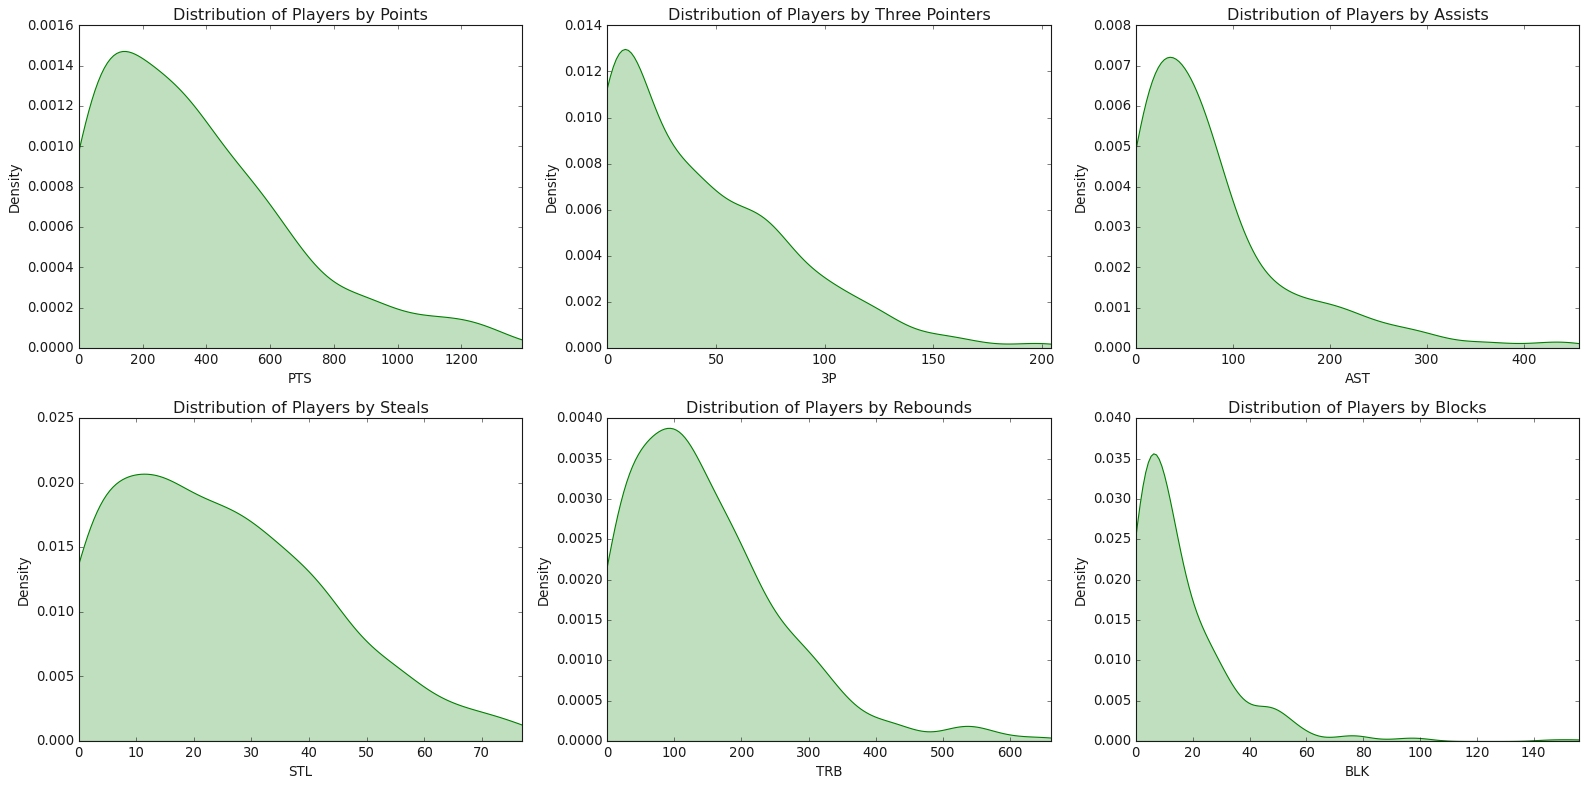

In [267]:
fig, axx = plt.subplots(2,3, figsize = (20,10))

axx[0,0].set_title('Distribution of Players by Points')
sns.kdeplot(x = 'PTS', data = ss, ax = axx[0,0], shade = True, color = 'green')
max_pts = ss['PTS'].max()
axx[0,0].set(xlim = (0,max_pts))

axx[0,1].set_title('Distribution of Players by Three Pointers')
sns.kdeplot(x = '3P', data = ss, ax = axx[0,1], shade = True, color = 'green')
max_3P = ss['3P'].max()
axx[0,1].set(xlim = (0,max_3P))

axx[0,2].set_title('Distribution of Players by Assists')
sns.kdeplot(x = 'AST', data = ss, ax = axx[0,2], shade = True, color = 'green')
max_AST = ss['AST'].max()
axx[0,2].set(xlim = (0,max_AST))

axx[1,0].set_title('Distribution of Players by Steals')
sns.kdeplot(x = 'STL', data = ss, ax = axx[1,0], shade = True, color = 'green')
max_STL = ss['STL'].max()
axx[1,0].set(xlim = (0,max_STL))

axx[1,1].set_title('Distribution of Players by Rebounds')
sns.kdeplot(x = 'TRB', data = ss, ax = axx[1,1], shade = True, color = 'green')
max_TRB = ss['TRB'].max()
axx[1,1].set(xlim = (0,max_TRB))

axx[1,2].set_title('Distribution of Players by Blocks')
sns.kdeplot(x = 'BLK', data = ss, ax = axx[1,2], shade = True, color = 'green')
max_BLK = ss['BLK'].max()
axx[1,2].set(xlim = (0,max_BLK))

fig.set_facecolor('white')
plt.tight_layout()

Here, we see the exact same plots but there are two distribution curves instead of one. The red curve represent players who make below average salary and the blue represent players that make above league average. As we can see in every statistic except for blocks, players who make above average salary on average have higher statistics.

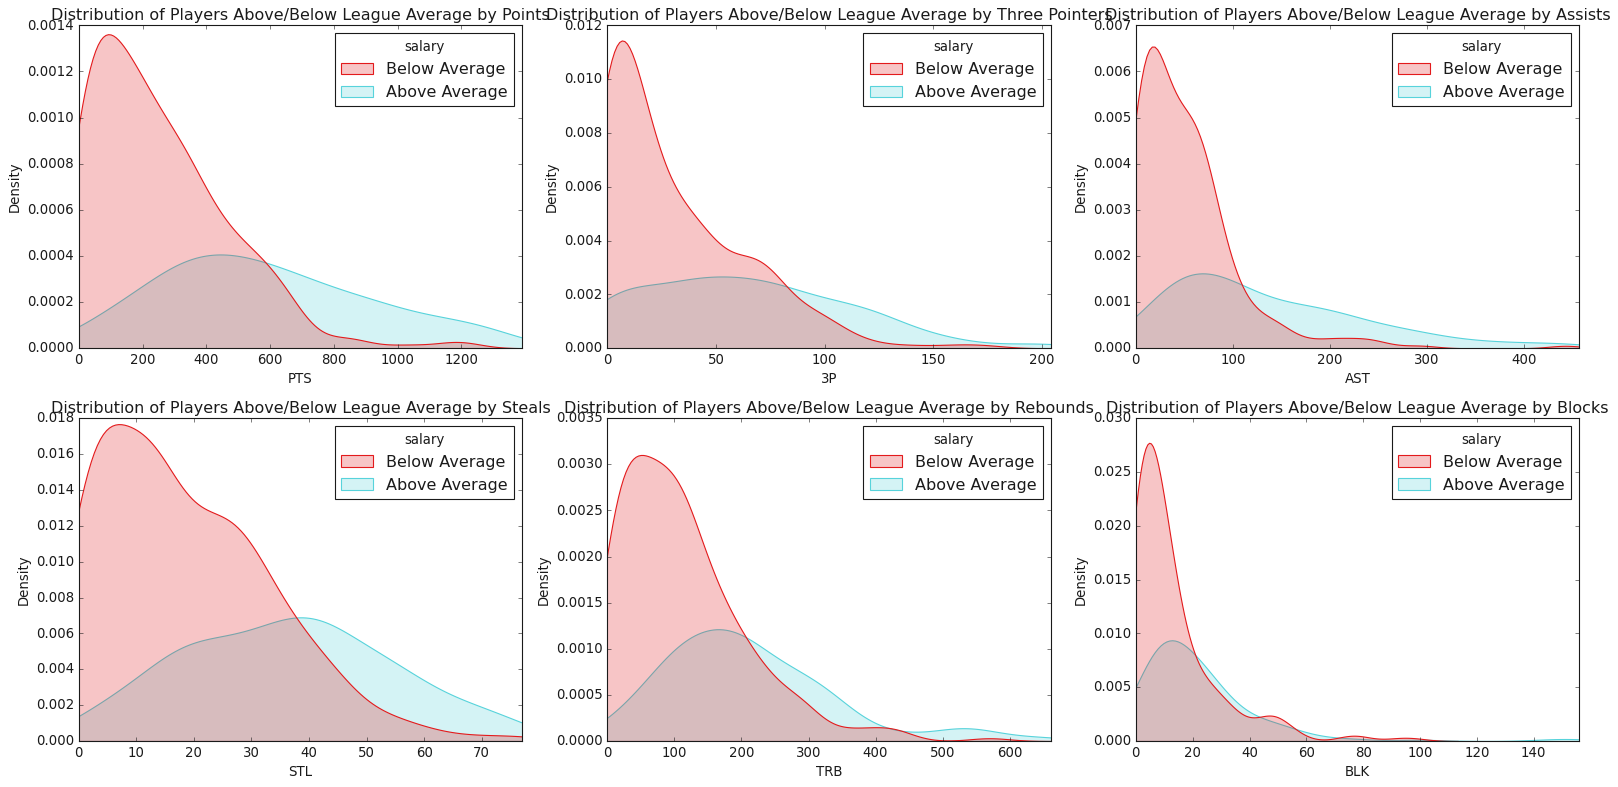

In [268]:
fig, axx = plt.subplots(2,3, figsize = (20,10))
legend_map = {0: 'Below Average', 1: 'Above Average'}

axx[0,0].set_title('Distribution of Players Above/Below League Average by Points')
sns.kdeplot(x = 'PTS', hue = ss['salary'].map(legend_map) , data = ss, ax = axx[0,0], shade = True,  palette = hlsg_r)
max_pts = ss['PTS'].max()
axx[0,0].set(xlim = (0,max_pts))

axx[0,1].set_title('Distribution of Players Above/Below League Average by Three Pointers')
sns.kdeplot(x = '3P', hue = ss['salary'].map(legend_map), data = ss, ax = axx[0,1], shade = True, palette = hlsg_r)
max_3P = ss['3P'].max()
axx[0,1].set(xlim = (0,max_3P))

axx[0,2].set_title('Distribution of Players Above/Below League Average by Assists')
sns.kdeplot(x = 'AST', hue = ss['salary'].map(legend_map), data = ss, ax = axx[0,2], shade = True, palette = hlsg_r)
max_AST = ss['AST'].max()
axx[0,2].set(xlim = (0,max_AST))

axx[1,0].set_title('Distribution of Players Above/Below League Average by Steals')
sns.kdeplot(x = 'STL', hue = ss['salary'].map(legend_map), data = ss, ax = axx[1,0], shade = True, palette = hlsg_r)
max_STL = ss['STL'].max()
axx[1,0].set(xlim = (0,max_STL))

axx[1,1].set_title('Distribution of Players Above/Below League Average by Rebounds')
sns.kdeplot(x = 'TRB', hue = ss['salary'].map(legend_map), data = ss, ax = axx[1,1], shade = True, palette = hlsg_r)
max_TRB = ss['TRB'].max()
axx[1,1].set(xlim = (0,max_TRB))

axx[1,2].set_title('Distribution of Players Above/Below League Average by Blocks')
sns.kdeplot(x = 'BLK', hue = ss['salary'].map(legend_map), data = ss, ax = axx[1,2], shade = True, palette = hlsg_r)
max_BLK = ss['BLK'].max()
axx[1,2].set(xlim = (0,max_BLK))

fig.set_facecolor('white')
plt.tight_layout()

Here, I wanted to see which statistics were correlated with higher salaries. As we would expect many categories are highly correlated with each other. For example points are highly correlated with all scoring categories because points is a dependent variable, dependent on field goals, three points and free throws. As expected points, assists and free throws had moderate correlation. Turnovers also had moderate correlation, I think this is due to usage rate. The more a player plays and has the ball in their hands, the more they will turn the ball over even though this a stat you would like to have less of. I purposely left out games played because I'm curious if the prediction models will disagree with the actual result due to a player essentially having injuries.

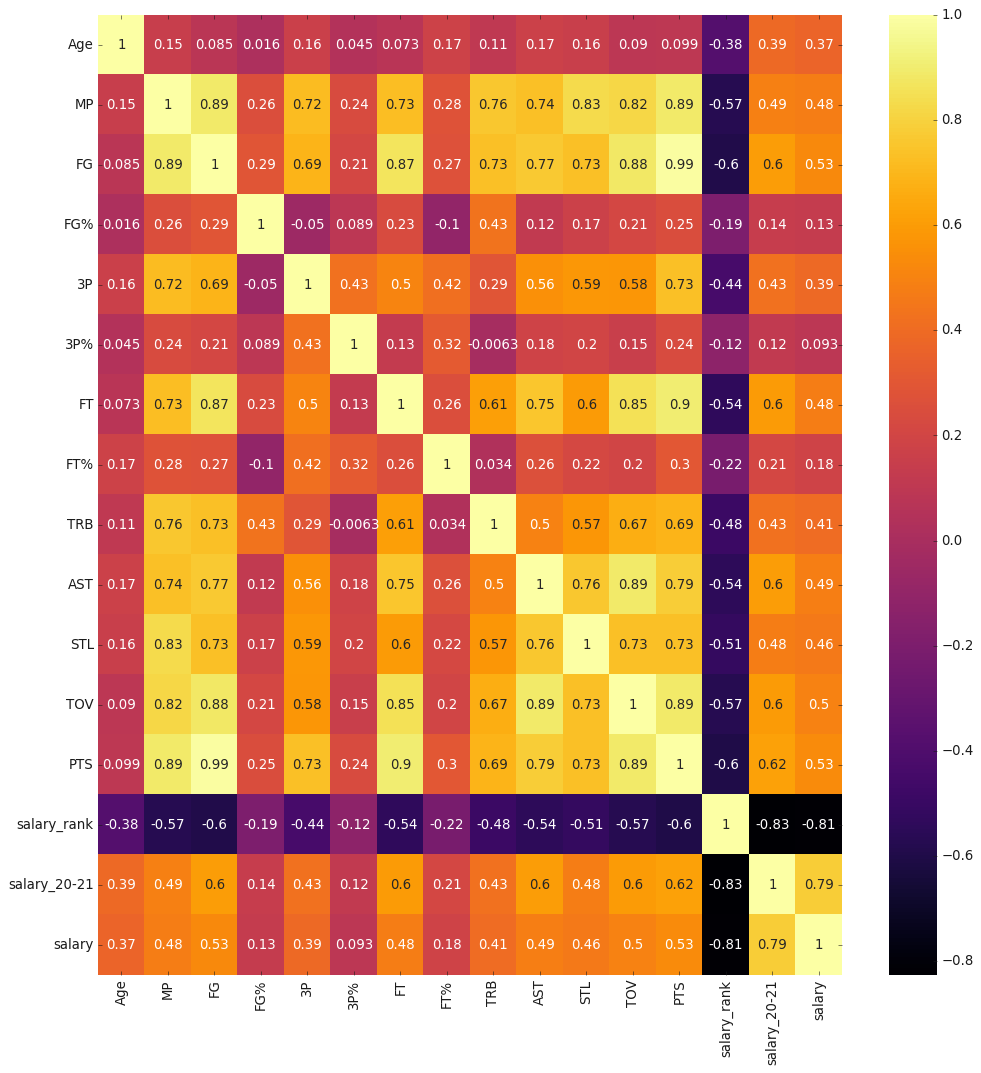

In [269]:
ss_corr = ss.loc[:,['Age','MP','FG','FG%', '3P', '3P%', 'FT', 'FT%', 'TRB', 'AST', 'STL','TOV', 'PTS', 'salary_rank', 'salary_20-21', 'salary']]
heat = plt.figure(figsize =(15,15))
sns.heatmap(ss_corr.corr(), cmap = 'inferno', annot = True)
heat.set_facecolor('white')

Here, I begin to separate my test and training data. I included the independent variables of X for my models to base their predictions off of.

In [270]:
X = ss[['Age','MP','FG','FG%', '3P', '3P%', 'FT', 'FT%', 'TRB', 'AST', 'STL','TOV', 'PTS']]
y = ss['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state = 1)

In [271]:
print("Number of Rows X_train dataset : ", X_train.shape)
print("Number of Rows y_train dataset : ", y_train.shape)
print("Number of Rows X_train dataset : ", X_test.shape)
print("Number of Rows y_train dataset : ", y_test.shape)

Number of Rows X_train dataset :  (311, 13)
Number of Rows y_train dataset :  (311,)
Number of Rows X_train dataset :  (128, 13)
Number of Rows y_train dataset :  (128,)


I used several different models, to see which one did best and the best one is the one I will use to make official predictions. 

In [272]:
models = []
models.append(['Logistic Regression', LogisticRegression(random_state=0, max_iter = 1000)])
models.append(['Random Forest Regressor',RandomForestClassifier(n_estimators = 106, random_state = 1)])
models.append(['SVM', SVC(random_state=5)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=5)])
models.append(['Extra Tree', ExtraTreesClassifier(random_state=5)])
models.append(['AdaBoost', AdaBoostClassifier(random_state=5)])
models.append(['Gradient Boost', GradientBoostingClassifier(random_state=5)])



lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred, zero_division = 0)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regression :
[[80  7]
 [12 29]]
Accuracy Score:  0.8515625

K-Fold Validation Mean Accuracy: 79.73 %

Standard Deviation: 7.67 %

ROC AUC Score: 0.81

Precision: 0.81

Recall: 0.71

F1: 0.75
-----------------------------------

Random Forest Regressor :
[[81  6]
 [16 25]]
Accuracy Score:  0.828125

K-Fold Validation Mean Accuracy: 77.18 %

Standard Deviation: 6.16 %

ROC AUC Score: 0.77

Precision: 0.81

Recall: 0.61

F1: 0.69
-----------------------------------

SVM :
[[76 11]
 [21 20]]
Accuracy Score:  0.75

K-Fold Validation Mean Accuracy: 74.29 %

Standard Deviation: 6.19 %

ROC AUC Score: 0.68

Precision: 0.65

Recall: 0.49

F1: 0.56
-----------------------------------

KNeighbors :
[[73 14]
 [20 21]]
Accuracy Score:  0.734375

K-Fold Validation Mean Accuracy: 71.74 %

Standard Deviation: 8.05 %

ROC AUC Score: 0.68

Precision: 0.60

Recall: 0.51

F1: 0.55
-----------------------------------

GaussianNB :
[[71 16]
 [15 26]]
Accuracy Score:  0.7578125

K-Fold Validation Me

C:\Users\wally\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Extra Tree :
[[80  7]
 [16 25]]
Accuracy Score:  0.8203125

K-Fold Validation Mean Accuracy: 80.71 %

Standard Deviation: 4.33 %

ROC AUC Score: 0.76

Precision: 0.78

Recall: 0.61

F1: 0.68
-----------------------------------

AdaBoost :
[[78  9]
 [10 31]]
Accuracy Score:  0.8515625

K-Fold Validation Mean Accuracy: 77.50 %

Standard Deviation: 5.55 %

ROC AUC Score: 0.83

Precision: 0.78

Recall: 0.76

F1: 0.77
-----------------------------------

Gradient Boost :
[[77 10]
 [14 27]]
Accuracy Score:  0.8125

K-Fold Validation Mean Accuracy: 75.89 %

Standard Deviation: 8.05 %

ROC AUC Score: 0.77

Precision: 0.73

Recall: 0.66

F1: 0.69
-----------------------------------



The models that did the best were the Logistic Regression and AdaBoost models. AdaBoost had a lower standard deviation which is what we want but I thought I'd go with Logistic Regression because I'm a bit more familiar with it. The Logistic Regression model got 85% correct which is excellent!

In [273]:
model_accuracy_df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
model_accuracy_df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
model_accuracy_df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regression,85.15625,79.727823,7.669569,0.813429,0.805556,0.707317,0.753247
8,AdaBoost,85.15625,77.500000,5.545784,0.826325,0.775000,0.756098,0.765432
1,Random Forest Regressor,82.81250,77.177419,6.163422,0.770395,0.806452,0.609756,0.694444
7,Extra Tree,82.03125,80.705645,4.331676,0.764648,0.781250,0.609756,0.684932
9,Gradient Boost,81.25000,75.887097,8.052006,0.771797,0.729730,0.658537,0.692308
4,GaussianNB,75.78125,77.167339,6.530710,0.725119,0.619048,0.634146,0.626506
2,SVM,75.00000,74.294355,6.191355,0.680684,0.645161,0.487805,0.555556
6,Decision Tree,75.00000,69.506048,9.323725,0.700028,0.621622,0.560976,0.589744
3,KNeighbors,73.43750,71.743952,8.053931,0.675638,0.600000,0.512195,0.552632
5,BernoulliNB,67.96875,63.669355,1.330645,0.500000,0.000000,0.000000,0.000000


I then took a deeper look at just how accurate our logistic regression model was. It only predicted 19 incorrect values. However the interesting part of this entire exercise is to be able to look at the players that our model disagreed with. This is the subset of players that our model has determined, the player either outperformed his contract or underperformed his contract.

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        87
           1       0.81      0.71      0.75        41

    accuracy                           0.85       128
   macro avg       0.84      0.81      0.82       128
weighted avg       0.85      0.85      0.85       128

ROC AUC Score: 0.888421642837118
Accuracy: 0.8515625


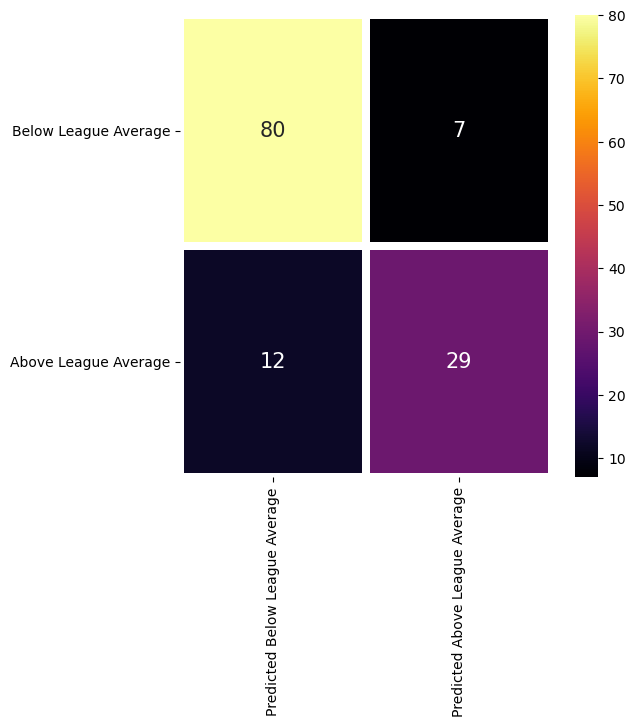

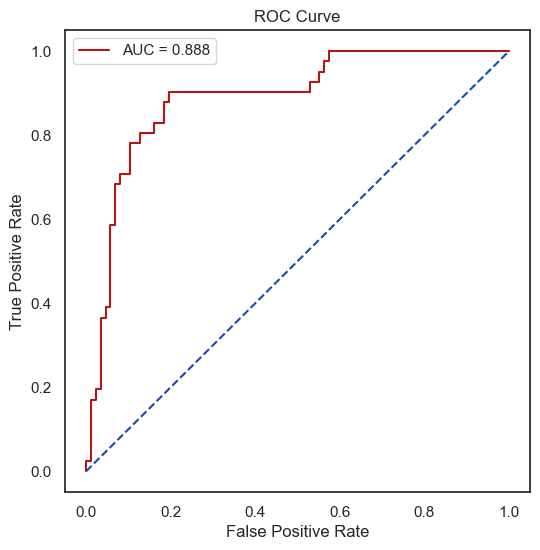

<Figure size 600x600 with 0 Axes>

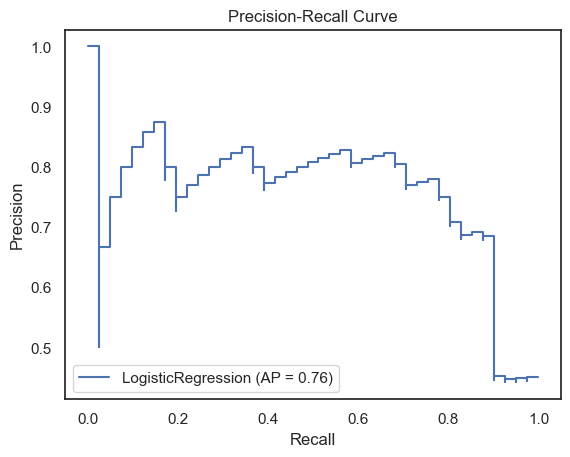

In [281]:
clf = LogisticRegression(random_state=0, max_iter = 1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_prob = clf.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob)}')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize = (6,6))
sns.heatmap(cm, cmap = 'inferno', annot = True, fmt = 'd', linewidths = 5, cbar = True, annot_kws = {'fontsize': 15}, yticklabels= ['Below League Average','Above League Average'], xticklabels= ['Predicted Below League Average', 'Predicted Above League Average'])
plt.yticks(rotation = 0)
plt.show()

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6,6))
plt.plot(false_positive_rate, true_positive_rate, color = '#b01717', label = 'AUC = %0.3f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize = (6,6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

Seeing as I was happy with the model, I decided to generate predictions for the entire dataset and add those predictions as a column 'y_pred' in our ss dataset.

In [275]:
y_pred = clf.predict(X)
ss['y_pred'] = y_pred
ss.sort_values(by = ['G'])

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_rank,salary_20-21,salary_21-22,signed_using,guaranteed_money,salary,y_pred
319,370,Anžejs Pasečņiks,C,25,WAS,1,0,6,0,1,0.000,0,1,0.000,0,0,0.502425,0.000,0,0,0.74666,1,0,1,1,0,0,5,2,0,484,350000,0,NaN,350000.0,0,0
230,267,Romeo Langford,SG,21,BOS,1,0,12,1,4,0.250,1,2,0.500,0,2,0.000000,0.375,0,0,0.74666,1,0,1,1,1,1,1,0,3,250,3631200,3804360,1st Round Pick,7435560.0,0,0
79,93,Marquese Chriss,PF,23,GSW,2,0,27,5,14,0.357,1,5,0.200,4,9,0.444000,0.393,2,4,0.50000,3,10,13,2,0,2,2,3,13,370,1824003,0,NaN,1824003.0,0,0
115,135,Henry Ellenson,PF,24,TOR,2,0,38,5,14,0.357,2,9,0.222,3,5,0.600000,0.429,3,4,0.75000,3,9,12,5,0,0,0,7,15,495,50000,0,NaN,50000.0,0,0
370,429,Iman Shumpert,SG,30,BRK,2,0,11,1,4,0.250,0,3,0.000,1,1,1.000000,0.250,0,0,0.74666,1,0,1,0,1,0,1,0,2,480,447155,0,NaN,447155.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,252,Cory Joseph,PG,29,TOT,51,2,1104,137,301,0.455,34,103,0.330,103,198,0.520000,0.512,55,67,0.82100,29,92,121,141,49,11,60,112,363,99,12600000,12600000,Cap Space,12600000.0,1,0
27,31,RJ Barrett,SG,20,NYK,51,51,1733,333,748,0.445,65,181,0.359,268,567,0.473000,0.489,152,207,0.73400,56,245,301,154,37,13,103,132,883,145,8231760,8623920,1st Round Pick,16855680.0,1,0
164,193,Joe Harris,SF,29,BRK,51,47,1581,265,520,0.510,164,339,0.484,101,181,0.558000,0.667,32,44,0.72700,32,154,186,91,31,10,40,107,726,72,16071429,17357143,Bird,72000000.0,1,1
112,132,Anthony Edwards,SG,19,MIN,51,34,1581,331,840,0.394,109,348,0.313,222,492,0.451000,0.459,128,163,0.78500,42,180,222,132,54,23,110,87,899,124,9757440,10245480,1st Round Pick,20002920.0,1,1


    Then I generated a subset of our ss dataset where our model disagreed with the actual player salaries, below or above league average. It generated 81 players that it disagreed on. That is 72% accuracy, well below the accuracy it had on the test set. However, why did it have lower accuracy? We have to remember that these players are not paid based on how well they actually produce during the season. The prediction model makes predictions based on their stats and thus is really evaluating whether a player has earned their contract. 
    Below there are some things that should be pointed out. I sorted the dataframe by salary_rank and the predictions are consistent. As we might expect, the cutoff line is the league average, between De'Antony Melton and Derrick Rose. If the values were different, they wouldn't be in this subset. That means that the prediction model believes that all players north of De'Antony Melton underperformed their contract and players including Derrick Rose and below, outperformed their contracts. If you notice in the 'G' column, games played, many of the players have not played many games of the possible 51 games to this point in the season. Players like Kevin Love, D'Angelo Russell, and Bogdan Bogdanovic who were payed high contracts and at the time were expected to play big roles, haven't played much this season. Outliers like Steven Adams, RJ Barrett and DeAndre Ayton have played several games this season and below, I tried looking for reasons as to why the prediction model didn't think they deserved to earn more than league average. Chalk it up to error, because in most categories they outperformed the averages of the players who do earn above league average.
    
    Now looking at the players in which the prediction model said they deserved to earn more than league average, they played on average 12 more games than the players who the model said didn't deserve to earn above league average. They also scored nearly twice as many points. They outperformed their counterparts in nearly every statistical category. Some of these players such as Trae Young, Bam Adebayo and Donovan Mitchell were all late picks in the draft and are still on their rookie deals so regardless of how they played, their contract value doesn't reflect their value to their team. Still all in all there are some head scratchers like Demarcus Cousins, Rajon Rondo and Marc Gasol whose stats don't dictate that they should be paid above league average mostly due to number of games played, points scored and a myriad of other stats were still somehow dictated by the model that they should be paid above league average.
    
    Then after looking at all of the description of those two subsets; players who 'outperformed' and 'underperformed', it was only natural to compare those subsets with the league averages overall and sure enough the players who outperformed their contracts had higher than league average stats and those players who underperformed had below league average stats.
    
    There were of course players who made above league average, where the prediction model agreed that they earned their contract yet based on their stats you would say they didn't such as LaMarcus Aldridge, Blake Griffin and Andre Iguodala. In addition players who made below league average, the prediction model agreed that they earned below league average yet their stats tell a different story such as Gary Trent Jr., Tyrese Haliburton and Jarrett Allen. One thing to note is that being a shutdown defender isn't a stat measured here. That adds value to a contract but isn't something that we had access to in this analysis.

In [276]:
pd.set_option('display.max_rows', 30)
pred_vs_actual = np.where((ss['salary'] != ss['y_pred']))
pred_wrong = ss.loc[pred_vs_actual]
pred_wrong.sort_values(by= ['salary_rank'])

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_rank,salary_20-21,salary_21-22,signed_using,guaranteed_money,salary,y_pred
245,283,Kevin Love,PF,32,CLE,7,7,128,18,49,0.367,10,29,0.345,8,20,0.400,0.469,9,11,0.818,4,31,35,14,3,1,11,9,55,20,31300000,31300000,Bird Rights,91500000.0,1,0
360,419,D'Angelo Russell,PG,24,MIN,21,19,608,146,345,0.423,63,155,0.406,83,190,0.437,0.514,55,73,0.753,10,47,57,104,23,11,56,41,410,33,28649250,30013500,Sign and Trade,90040500.0,1,0
333,387,Otto Porter,SF-PF,27,TOT,28,6,606,98,227,0.432,39,104,0.375,59,123,0.480,0.518,36,42,0.857,28,124,152,55,16,4,25,41,271,36,28489239,0,Bird Rights,28489239.0,1,0
1,3,Steven Adams,C,27,NOP,45,45,1268,156,250,0.624,0,3,0.000,156,247,0.632,0.624,47,105,0.448,176,227,403,89,41,30,67,93,359,39,27528090,17073171,1st Round Pick,62528090.0,1,0
163,191,Gary Harris,SG,26,DEN,19,19,581,69,156,0.442,24,75,0.320,45,81,0.556,0.519,22,30,0.733,13,34,47,32,17,4,14,37,184,54,19160714,20482143,1st Round Pick,39642857.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,233,Reggie Jackson,SG,30,LAC,48,28,1030,168,376,0.447,72,176,0.409,96,200,0.480,0.543,44,56,0.786,16,111,127,140,28,4,53,91,452,317,2331593,0,Minimum Salary,2331593.0,0,1
88,104,DeMarcus Cousins,C,30,HOU,25,11,506,79,210,0.376,39,116,0.336,40,94,0.426,0.469,44,59,0.746,30,161,191,60,21,18,39,74,241,318,2331593,0,NaN,2331593.0,0,1
31,36,Kent Bazemore,SF,31,GSW,48,1,784,102,230,0.443,42,111,0.378,60,119,0.504,0.535,33,48,0.688,17,121,138,72,40,23,53,103,279,321,2320044,0,Minimum Salary,2320044.0,0,1
147,171,Devonte' Graham,PG,25,CHO,39,33,1161,168,451,0.373,115,309,0.372,53,142,0.373,0.500,88,106,0.830,17,90,107,198,40,3,58,53,539,400,1663861,0,NaN,NaN,0,1


In [277]:
ss.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_rank,salary_20-21,salary_21-22,guaranteed_money,salary,y_pred
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,4.390000e+02,4.390000e+02,4.160000e+02,439.000000,439.000000
mean,255.637813,25.897494,33.829157,16.769932,794.029613,136.050114,292.043280,0.451435,42.068337,114.355353,0.321765,93.981777,177.687927,0.512417,0.520902,56.177677,72.134396,0.753852,32.321185,114.070615,146.391800,81.104784,24.767654,16.186788,43.979499,63.685649,370.346241,235.779043,8.359425e+06,7.289713e+06,2.289721e+07,0.350797,0.307517
std,147.452735,4.185316,13.157475,17.455473,486.052463,110.641641,229.313728,0.100945,41.008351,104.235667,0.129718,87.654233,159.871683,0.115401,0.098339,61.655808,76.076342,0.137064,34.114356,88.816737,116.605358,84.281210,18.123643,18.776059,38.142990,38.588291,305.332633,140.808815,9.357734e+06,1.037454e+07,3.715334e+07,0.477764,0.461992
min,1.000000,19.000000,1.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000e+04,0.000000e+00,5.000000e+04,0.000000,0.000000
25%,129.500000,22.000000,25.000000,1.000000,369.000000,49.500000,105.500000,0.404000,7.000000,23.500000,0.290000,26.500000,54.000000,0.462500,0.485500,15.000000,19.000000,0.688000,9.000000,49.000000,59.500000,23.000000,10.500000,4.000000,16.000000,34.000000,129.000000,112.500000,2.000000e+06,0.000000e+00,2.717302e+06,0.000000,0.000000
50%,254.000000,25.000000,37.000000,9.000000,789.000000,112.000000,251.000000,0.446000,33.000000,92.000000,0.348000,62.000000,127.000000,0.516000,0.531000,35.000000,47.000000,0.772000,21.000000,94.000000,120.000000,58.000000,22.000000,11.000000,34.000000,64.000000,307.000000,233.000000,4.137302e+06,2.320000e+06,7.336614e+06,0.000000,0.000000
75%,382.500000,29.000000,45.000000,32.000000,1197.000000,199.500000,422.000000,0.500000,68.500000,181.500000,0.390500,138.000000,250.500000,0.573000,0.571000,76.000000,95.500000,0.850000,41.000000,161.500000,201.500000,102.500000,37.000000,22.500000,60.000000,91.000000,542.500000,357.500000,1.093487e+07,9.909374e+06,2.271336e+07,1.000000,1.000000
max,511.000000,37.000000,51.000000,51.000000,1849.000000,508.000000,986.000000,1.000000,204.000000,533.000000,1.000000,436.000000,727.000000,1.000000,1.000000,361.000000,447.000000,1.000000,211.000000,494.000000,661.000000,457.000000,77.000000,156.000000,210.000000,173.000000,1391.000000,495.000000,4.300636e+07,4.578097e+07,2.276270e+08,1.000000,1.000000


In [278]:
outperformed = pred_wrong[pred_wrong['y_pred']== 1]
underperformed = pred_wrong[pred_wrong['y_pred']== 0]
outperformed.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_rank,salary_20-21,salary_21-22,guaranteed_money,salary,y_pred
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,3.000000e+01,31.0,31.0
mean,204.548387,29.000000,42.741935,22.645161,1088.580645,192.838710,411.935484,0.465226,57.645161,153.612903,0.342452,135.193548,258.322581,0.510258,0.537613,88.645161,111.354839,0.766323,50.612903,160.032258,210.645161,119.419355,32.870968,25.290323,66.161290,92.903226,531.967742,242.451613,4.521013e+06,4.650101e+06,1.741916e+07,0.0,1.0
std,139.005717,4.640402,6.913599,17.769915,333.548675,95.817916,197.448885,0.069272,40.644432,103.456489,0.085642,89.131147,159.043891,0.067339,0.048472,77.420733,90.198503,0.095377,46.031639,79.530071,122.994728,91.293583,14.490783,22.534704,37.876199,33.633668,277.463810,75.198333,1.777118e+06,7.242397e+06,3.680406e+07,0.0,0.0
min,4.000000,22.000000,25.000000,1.000000,415.000000,45.000000,113.000000,0.373000,0.000000,1.000000,0.000000,28.000000,57.000000,0.373000,0.463000,1.000000,2.000000,0.500000,4.000000,52.000000,56.000000,31.000000,13.000000,1.000000,26.000000,29.000000,108.000000,157.000000,1.663861e+06,0.000000e+00,4.404720e+05,0.0,1.0
25%,101.500000,24.500000,38.000000,5.000000,845.000000,113.000000,263.000000,0.419500,25.000000,85.000000,0.314000,60.500000,123.500000,0.463000,0.505500,35.500000,50.000000,0.724500,19.000000,114.000000,132.500000,63.000000,22.000000,11.000000,41.500000,76.000000,319.000000,185.500000,2.784989e+06,0.000000e+00,2.957890e+06,0.0,1.0
50%,177.000000,30.000000,47.000000,24.000000,1149.000000,168.000000,394.000000,0.439000,60.000000,165.000000,0.372000,108.000000,205.000000,0.517000,0.528000,67.000000,81.000000,0.786000,32.000000,147.000000,177.000000,82.000000,29.000000,18.000000,53.000000,93.000000,495.000000,216.000000,4.767000e+06,0.000000e+00,6.487805e+06,0.0,1.0
75%,286.000000,33.000000,48.000000,39.500000,1342.500000,244.500000,524.500000,0.513500,81.500000,206.000000,0.390000,187.000000,369.500000,0.553000,0.569500,104.500000,150.000000,0.829500,69.500000,184.500000,254.000000,149.500000,40.000000,34.000000,83.500000,106.000000,656.500000,297.500000,5.860200e+06,7.004808e+06,1.387500e+07,0.0,1.0
max,509.000000,36.000000,50.000000,48.000000,1611.000000,408.000000,937.000000,0.641000,159.000000,402.000000,0.424000,315.000000,598.000000,0.650000,0.643000,361.000000,414.000000,0.923000,209.000000,361.000000,570.000000,443.000000,77.000000,98.000000,205.000000,173.000000,1195.000000,481.000000,7.682927e+06,2.810355e+07,1.681161e+08,0.0,1.0


In [279]:
underperformed.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_rank,salary_20-21,salary_21-22,guaranteed_money,salary,y_pred
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,5.000000e+01,5.000000e+01,5.000000e+01,50.0,50.0
mean,263.480000,26.820000,30.160000,18.660000,750.280000,108.120000,232.640000,0.460260,32.020000,88.380000,0.316103,76.100000,144.260000,0.514448,0.532480,41.020000,55.380000,0.762160,38.26000,107.560000,145.820000,64.480000,22.900000,18.100000,36.020000,65.140000,289.280000,106.14000,1.286340e+07,1.088656e+07,2.758399e+07,1.0,0.0
std,161.097415,3.497463,14.279084,15.554526,411.295963,67.861095,140.335714,0.076739,26.796657,70.528874,0.123677,62.751941,112.558884,0.075074,0.074116,29.288495,40.694928,0.139545,40.86454,75.453232,111.687737,47.782347,14.058551,25.056874,22.382108,39.267793,174.044686,35.12137,5.709764e+06,6.730087e+06,1.986097e+07,0.0,0.0
min,3.000000,19.000000,3.000000,0.000000,29.000000,3.000000,7.000000,0.338000,0.000000,0.000000,0.000000,0.000000,0.000000,0.372000,0.360000,1.000000,2.000000,0.407000,0.00000,7.000000,7.000000,2.000000,0.000000,0.000000,2.000000,4.000000,10.000000,20.00000,7.812500e+06,0.000000e+00,1.800000e+06,1.0,0.0
25%,125.000000,25.000000,19.500000,6.000000,418.250000,59.500000,132.750000,0.405750,5.250000,21.250000,0.290500,34.000000,62.250000,0.459250,0.481500,18.250000,23.250000,0.673250,13.50000,65.500000,79.000000,32.250000,13.750000,7.000000,18.750000,37.750000,161.250000,86.00000,9.258000e+06,8.691468e+06,1.543362e+07,1.0,0.0
50%,270.500000,27.000000,32.000000,15.000000,738.000000,111.500000,225.000000,0.443000,31.500000,94.000000,0.335000,58.500000,126.000000,0.510500,0.529000,38.500000,49.000000,0.783500,25.00000,91.500000,115.000000,47.500000,20.500000,11.500000,33.000000,61.000000,289.000000,111.50000,1.112702e+07,1.059545e+07,2.063788e+07,1.0,0.0
75%,401.000000,29.000000,41.250000,29.750000,999.000000,136.750000,311.750000,0.506500,53.000000,129.250000,0.386750,107.250000,196.750000,0.559000,0.579750,55.000000,72.750000,0.857000,48.25000,139.250000,195.000000,90.500000,34.500000,19.750000,50.750000,91.000000,386.500000,133.50000,1.381834e+07,1.400046e+07,3.276818e+07,1.0,0.0
max,510.000000,35.000000,51.000000,51.000000,1733.000000,333.000000,748.000000,0.648000,105.000000,270.000000,0.574000,305.000000,567.000000,0.714000,0.719000,152.000000,207.000000,1.000000,176.00000,371.000000,529.000000,194.000000,52.000000,156.000000,103.000000,161.000000,883.000000,156.00000,3.130000e+07,3.130000e+07,9.150000e+07,1.0,0.0


As we can see, the players who were unfairly paid, outmatched their counterparts who were determined to earn too much.

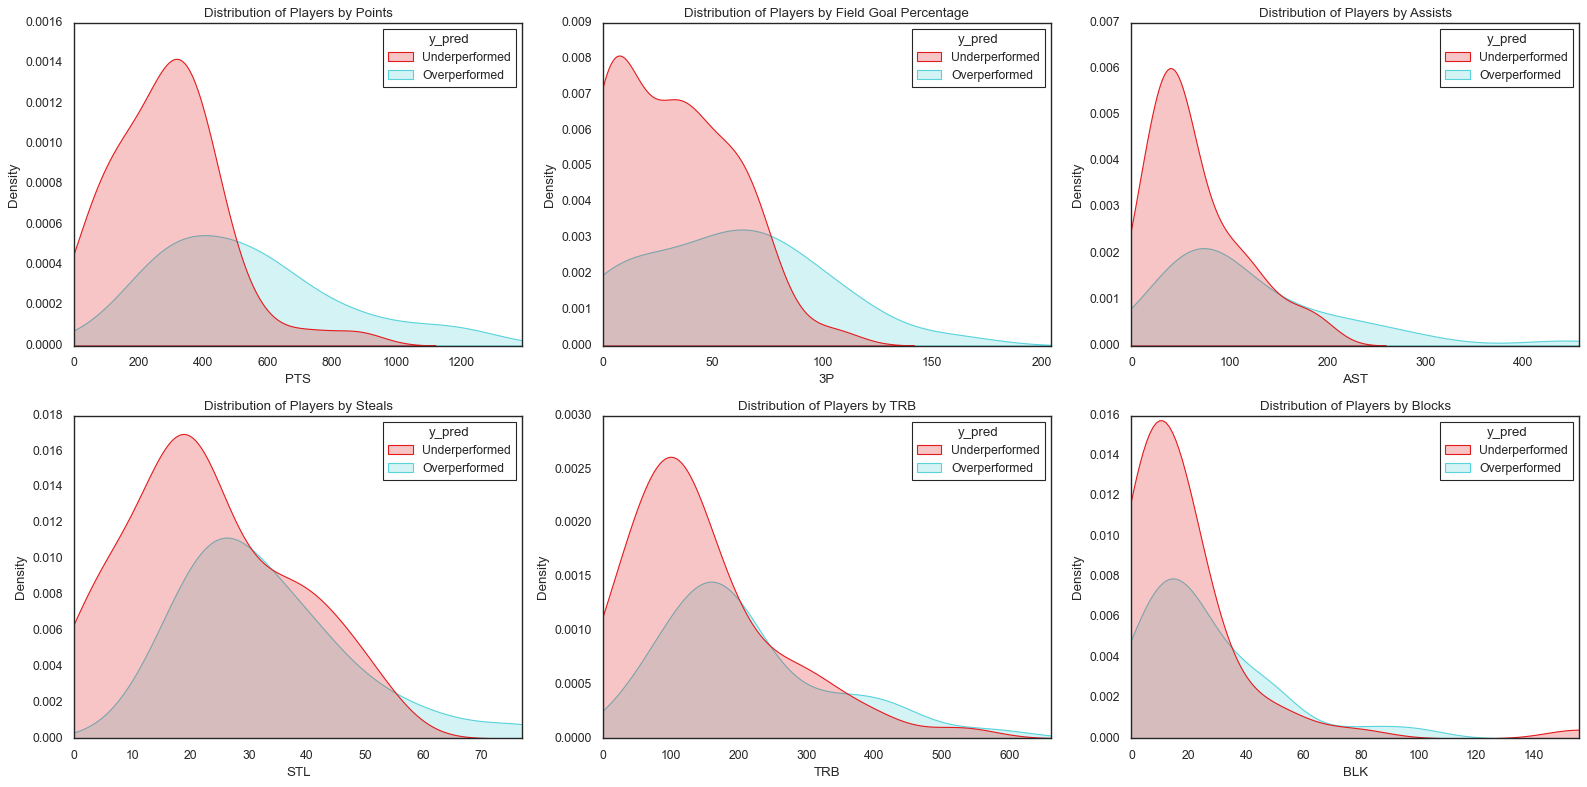

In [280]:
fig, axx = plt.subplots(2,3, figsize = (20,10))
legend_map = {0: 'Underperformed', 1: 'Overperformed'}

axx[0,0].set_title('Distribution of Players by Points')
sns.kdeplot(x = 'PTS', hue = pred_wrong['y_pred'].map(legend_map) , data = pred_wrong, ax = axx[0,0], shade = True,  palette = hlsg_r)
max_pts = ss['PTS'].max()
axx[0,0].set(xlim = (0,max_pts))

axx[0,1].set_title('Distribution of Players by Field Goal Percentage')
sns.kdeplot(x = '3P', hue = pred_wrong['y_pred'].map(legend_map), data = pred_wrong, ax = axx[0,1], shade = True, palette = hlsg_r)
max_3P = ss['3P'].max()
axx[0,1].set(xlim = (0,max_3P))

axx[0,2].set_title('Distribution of Players by Assists')
sns.kdeplot(x = 'AST', hue = pred_wrong['y_pred'].map(legend_map), data = pred_wrong, ax = axx[0,2], shade = True, palette = hlsg_r)
max_AST = ss['AST'].max()
axx[0,2].set(xlim = (0,max_AST))

axx[1,0].set_title('Distribution of Players by Steals')
sns.kdeplot(x = 'STL', hue = pred_wrong['y_pred'].map(legend_map), data = pred_wrong, ax = axx[1,0], shade = True, palette = hlsg_r)
max_STL = ss['STL'].max()
axx[1,0].set(xlim = (0,max_STL))

axx[1,1].set_title('Distribution of Players by TRB')
sns.kdeplot(x = 'TRB', hue = pred_wrong['y_pred'].map(legend_map), data = pred_wrong, ax = axx[1,1], shade = True, palette = hlsg_r)
max_TRB = ss['TRB'].max()
axx[1,1].set(xlim = (0,max_TRB))

axx[1,2].set_title('Distribution of Players by Blocks')
sns.kdeplot(x = 'BLK', hue = pred_wrong['y_pred'].map(legend_map), data = pred_wrong, ax = axx[1,2], shade = True, palette = hlsg_r)
max_BLK = ss['BLK'].max()
axx[1,2].set(xlim = (0,max_BLK))

fig.set_facecolor('white')
plt.tight_layout()

Although there were a few players who seemed to be put in the wrong category, ultimately we achieved our goal. We wanted to construct a model that could perform at a decent accuracy and all the players that ended up in our subset of underperformed or overperformed were players that, if you're an NBA fan, you had to at least think about whether they should earn above league average. Our model identified players who didn't play many games, due to injury or otherwise.

Conclusion:
We can conclude that we can different player stats are essentially good at predicting which players earn above league average. We can also use predictive models to perhaps measure whether players overperformed or underperformed for previous years and if there's a pattern, perhaps we can use this information to anticipate whether a player will earn their entire contract. Injuries obviously must also be taken into account and can explain outlier years. There are many players where it is difficult to judge what their value should be and although a player may demand more money than he is worth due to the market being in demand for his services, at least an organization can go into a situation knowing whether they will be overpaying or underpaying or if they have overpaid or underpaid and whether or not to extend a player at a certain premium.

Thank you for reading! -Walter